<a href="https://colab.research.google.com/github/marcelounb/Deep_Learning_with_python_JasonBrownlee/blob/master/08_2_Pima_Indians_Onset_of_Diabetes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8.1 & 8.2 Pima Indians Onset of Diabetes Dataset
 patient medical record data for Pima Indians and whether they had an onset of diabetes within ﬁve years. It is a binary classiﬁcation problem (onset of diabetes as 1 or not as 0). The input variables that describe each patient are numerical and have varying scales. Below lists the eight attributes for the dataset:
1. Number of times pregnant.
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
3. Diastolic blood pressure (mm Hg).
4. Triceps skin fold thickness (mm).
5. 2-Hour serum insulin (mu U/ml).
6. Body mass index.
7. Diabetes pedigree function.
8. Age (years).
9. Class, onset of diabetes within ﬁve years.

Given that all attributes are numerical makes it easy to use directly with neural networks that expect numerical inputs and output values, and ideal for our ﬁrst neural network in Keras. This dataset will also be used for a number of additional lessons coming up in this book, so keep it handy. below is a sample of the dataset showing the ﬁrst 5 rows of the 768 instances:

6,148,72,35,0,33.6,0.627,50,1 

1,85,66,29,0,26.6,0.351,31,0 

8,183,64,0,0,23.3,0.672,32,1 

1,89,66,23,94,28.1,0.167,21,0 

0,137,40,35,168,43.1,2.288,33,1


# Loading Data

In [1]:
from keras.models import Sequential 
from keras.layers import Dense 
import numpy as np
# fix random seed for reproducibility 
seed = 7 
np.random.seed(seed)

Using TensorFlow backend.


In [0]:
# load pima indians dataset 
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",") 
# split into input (X) and output (Y) variables 
X = dataset[:,0:8] 
Y = dataset[:,8]

# split into 67% for train and 33% for test MANUAL VERSION
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=seed
# Then on fitting
# model.fit(X_train, y_train, validation_data=(X_test,y_test), nb_epoch=150, batch_size=10)

In [3]:
X.shape

(768, 8)

In [4]:
Y.shape

(768,)

# Deﬁning the Model
In this example we will use a fully-connected network structure with three layers.

Fully connected layers are deﬁned using the Dense class. We can specify the number of neurons in the layer as the ﬁrst argument, the initialization method as the second argument as init and specify the activation function using the activation argument. In this case we initialize the network weights to a small random number generated from a uniform distribution (uniform), in this case between 0 and 0.05 because that is the default uniform weight initialization in Keras. Another traditional alternative would be normal for small random numbers generated from a Gaussian distribution.

We will use the rectiﬁer (relu) activation function on the ﬁrst two layers and thesigmoid activation function in the output layer. It used to be the case that sigmoid and tanh activation functions were preferred for all layers. These days, better performance is seen using the rectiﬁer activation function. We use a sigmoid activation function on the output layer to ensure our network output is between 0 and 1 and easy to map to either a probability of class 1 or snap to a hard classiﬁcation of either class with a default threshold of 0.5. We can piece it all together by adding each layer. The ﬁrst hidden layer has 12 neurons and expects 8 input variables. The second hidden layer has 8 neurons and ﬁnally the output layer has 1 neuron to predict the class (onset of diabetes or not).

In [0]:
# create model 
model = Sequential() 
model.add(Dense(12, input_dim=8, kernel_initializer= 'uniform' , activation= 'relu' )) 
model.add(Dense(8, kernel_initializer= 'uniform' , activation= 'relu' )) 
model.add(Dense(1, kernel_initializer= 'uniform' , activation= 'sigmoid' ))

# Compiling the Model
Now that the model is deﬁned, we can compile it. Compiling the model uses the ecient numerical libraries under the covers (the so-called backend) such as Theano or TensorFlow. The backend automatically chooses the best way to represent the network for training and making predictions to run on your hardware. When compiling, we must specify some additional properties required when training the network. Remember training a network means ﬁnding the best set of weights to make predictions for this problem.

We must specify the loss function to use to evaluate a set of weights, the optimizer used to search through di↵erent weights for the network and any optional metrics we would like to collect and report during training. In this case we will use logarithmic loss, which for a binary classiﬁcation problem is deﬁned in Keras as binary crossentropy. We will also use the ecient gradient descent algorithm adam for no other reason that it is an ecient default. Learn more about the Adam optimization algorithm in the paper Adam: A Method for Stochastic Optimization (http://arxiv.org/abs/1412.6980). Finally, because it is a classiﬁcation problem, we will collect and report the classiﬁcation accuracy as the metric

In [0]:
# Compile model 
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

# Fiting the Model
We have deﬁned our model and compiled it ready for ecient computation. Now it is time to execute the model on some data. We can train or ﬁt our model on our loaded data by calling the fit( ) function on the model. 

The training process will run for a ﬁxed number of iterations through the dataset called epochs, that we must specify using the nb epoch argument. We can also set the number of instances that are evaluated before a weight update in the network is performed called the batch size and set using the batch size argument. For this problem we will run for a small number of epochs (150) and use a relatively small batch size of 10. Again, these can be chosen experimentally by trial and error.

In [7]:
#Model fit
# epochs_hist = model.fit(X, Y, epochs=300, batch_size=15)

# split into 67% for train and 33% for test AUTOMATIC VERSION

epochs_hist = model.fit(X, Y, validation_split=0.33, nb_epoch=150, batch_size=10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 514 samples, validate on 254 samples
Epoch 1/150
514/514 [==============================] - 0s 433us/step - loss: 0.6800 - accuracy: 0.6401 - val_loss: 0.6588 - val_accuracy: 0.6732
Epoch 2/150
514/514 [==============================] - 0s 153us/step - loss: 0.6688 - accuracy: 0.6401 - val_loss: 0.6535 - val_accuracy: 0.6732
Epoch 3/150
514/514 [==============================] - 0s 166us/step - loss: 0.6614 - accuracy: 0.6401 - val_loss: 0.6510 - val_accuracy: 0.6732
Epoch 4/150
514/514 [==============================] - 0s 155us/step - loss: 0.6515 - accuracy: 0.6420 - val_loss: 0.6436 - val_accuracy: 0.6811
Epoch 5/150
514/514 [==============================] - 0s 162us/step - loss: 0.6390 - accuracy: 0.6576 - val_loss: 0.6308 - val_accuracy: 0.6614
Epoch 6/150
514/514 [==============================] - 0s 156us/step - loss: 0.6309 - accuracy: 0.6479 - val_loss: 0.6173 - val_accuracy: 0.6850
Epoch 7/150
514/514 [==============================] - 0s 174us/step - loss: 0.6180 

# Evaluate Model


In [8]:
# evaluate the model 
scores = model.evaluate(X, Y) 
model.metrics_names[1], scores[1]*100

768/768 [==============================] - 0s 27us/step


('accuracy', 76.69270634651184)

#Plotting it all

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
epochs_hist.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

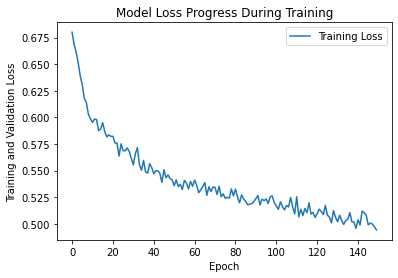

In [11]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss']);

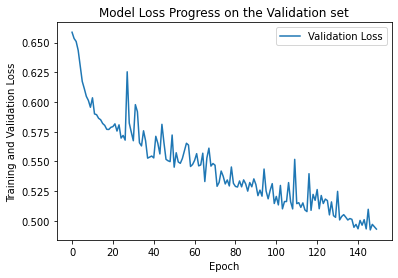

In [13]:
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress on the Validation set')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Validation Loss']);